In [ ]:
import pandas as pd # for using dataframes
import numpy as np # for numerical data usage
import seaborn as sns # to visualise data and plots statistically
import matplotlib.pyplot as plt # to plot the data
from sklearn.model_selection import train_test_split # splitting into training and testing data
from sklearn.preprocessing import LabelEncoder, StandardScaler # for lables and feature selection
from sklearn.ensemble import RandomForestClassifier # model used to classify the data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # checking the accuracy of the model


In [ ]:
data_frame = pd.read_csv("/content/IRIS.csv")

In [ ]:
print("First 5 rows:\n", data_frame.head())
print("\nSpecies count:\n", data_frame['species'].value_counts())


First 5 rows:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Species count:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
lable_enco = LabelEncoder()   # converting categorial to numerical data
data_frame['species'] = lable_enco.fit_transform(data_frame['species'])


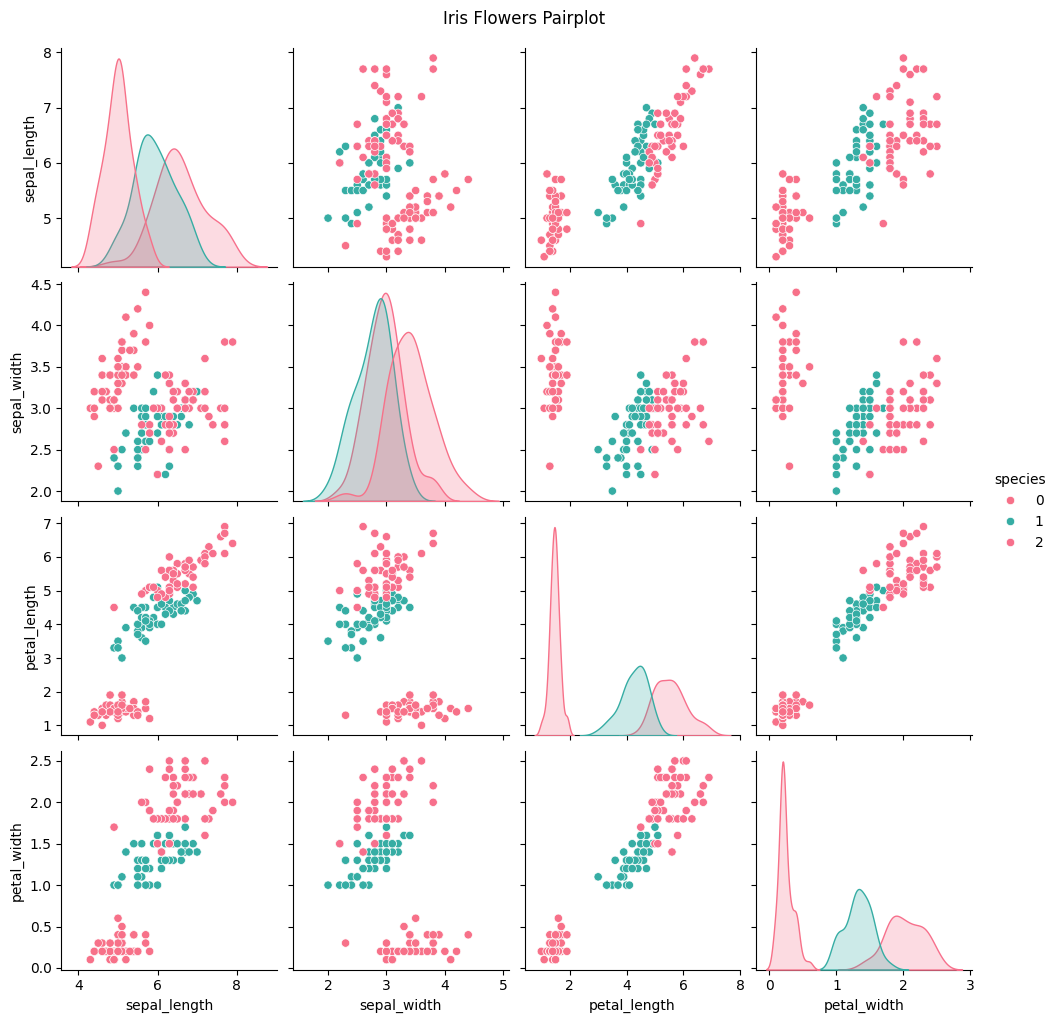

In [ ]:
sns.pairplot(data_frame, hue="species", palette="husl")
plt.suptitle("Iris Flowers Pairplot", y=1.02)
plt.show()


In [ ]:
X = data_frame.drop('species', axis=1)
y = data_frame['species']


In [ ]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_data = scaler.fit_transform(X_train_data)
X_test_data = scaler.transform(X_test_data)


In [ ]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train_data, y_train_data)


RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
y_pred = model.predict(X_test_data)
print("\n Accuracy Score:", accuracy_score(y_test_data, y_pred))
print("\n Classification Report:\n", classification_report(y_test_data, y_pred, target_names=lable_enco.classes_))



 Accuracy Score: 1.0

 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



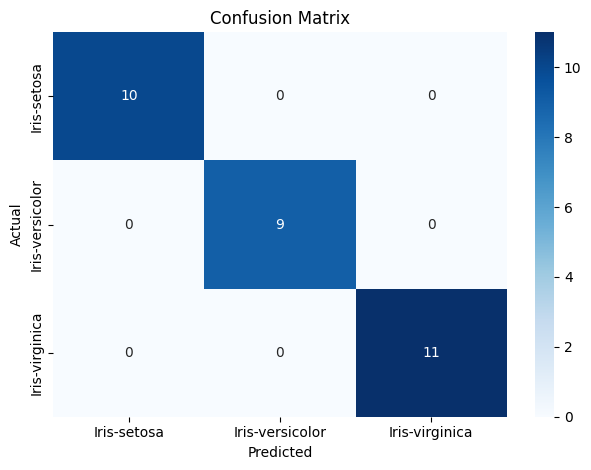

In [ ]:
conf_matrix = confusion_matrix(y_test_data, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues',xticklabels=lable_enco.classes_, yticklabels=lable_enco.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
